# Lernen im mehrschichtigen Netz

## Gradientenabstieg

Input x = 0.200000, Gewünschter Output y = 0.20
Iter	x	w	net i	a	y_hat	y	E		E'	w delta
0	0.2	-10.00	-2.00	0.12	0.12	0.20	0.003264	-0.01	0.03
10	0.2	-9.75	-1.95	0.12	0.12	0.20	0.002844	-0.01	0.02
20	0.2	-9.51	-1.90	0.13	0.13	0.20	0.002452	-0.01	0.02
30	0.2	-9.27	-1.85	0.14	0.14	0.20	0.002091	-0.01	0.02
40	0.2	-9.05	-1.81	0.14	0.14	0.20	0.001764	-0.01	0.02
50	0.2	-8.84	-1.77	0.15	0.15	0.20	0.001472	-0.01	0.02
60	0.2	-8.65	-1.73	0.15	0.15	0.20	0.001214	-0.01	0.02
70	0.2	-8.46	-1.69	0.16	0.16	0.20	0.000992	-0.01	0.02
80	0.2	-8.29	-1.66	0.16	0.16	0.20	0.000802	-0.01	0.02
90	0.2	-8.14	-1.63	0.16	0.16	0.20	0.000642	-0.00	0.01
100	0.2	-8.00	-1.60	0.17	0.17	0.20	0.000509	-0.00	0.01
110	0.2	-7.87	-1.57	0.17	0.17	0.20	0.000401	-0.00	0.01
120	0.2	-7.75	-1.55	0.17	0.17	0.20	0.000313	-0.00	0.01
130	0.2	-7.65	-1.53	0.18	0.18	0.20	0.000242	-0.00	0.01
140	0.2	-7.56	-1.51	0.18	0.18	0.20	0.000187	-0.00	0.01
150	0.2	-7.48	-1.50	0.18	0.18	0.20	0.000143	-0.00	0.01
160	0.2	-7.41	-1.48	0.19	0.19	0.20	0.000109

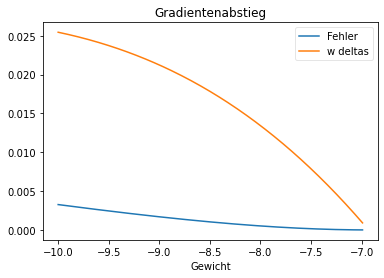

In [14]:
import matplotlib.pyplot as plt
import numpy as np
# Wichtig!
%matplotlib inline

def func_id(x):
    return x

def func_sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

# Init
x = 0.2
y = x
eta = 3
iterationen = 300
# Startgewicht
weight = -10.0

# für Plot
weights = []
errors = []
w_deltas = []

print("Input x = {:.6f}, Gewünschter Output y = {:.2f}".format(x, y))
print("{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t\t{}\t{}".format('Iter', 'x', 'w', 'net i', 'a', 'y_hat', 'y', 'E', "E'", 'w delta'))

# iterationen Schritte
for step in range(iterationen):
    # net_i
    net_i = weight * x
    # Aktivierung
    # activation = func_id(net_i)
    activation = func_sigmoid(net_i)
    # Output
    y_hat = activation
    # quadratischer Fehler
    error = 0.5 * (y - y_hat)**2
    # Gradient
    # derivative = (-1.0) * x * (y - y_hat)
    derivative = (-1.0) * activation * (1.0 - activation) * (y - y_hat)
    # delta für Gewichtsanpassung
    w_delta = (-1.0) * derivative * eta
    
    weights.append(weight)
    errors.append(error)
    w_deltas.append(w_delta)
    
    # Ausgabe alle 10 Schritte
    if step % 10 == 0:
        print("{}\t{}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.6f}\t{:.2f}\t{:.2f}".format(step, x, weight, net_i,
                                                                                              activation, y_hat, y, error,
                                                                                              derivative, w_delta))
    
    # Lernen
    weight += w_delta

## Plot
# figure und subplot
fig, ax1 = plt.subplots()
ax1.plot(weights, errors, label="Fehler")
ax1.plot(weights, w_deltas, label="w deltas")
# Titel
ax1.set_title('Gradientenabstieg')
# Legende
legend = ax1.legend(loc='best', fancybox=True, framealpha=0.5)
# Label
plt.xlabel('Gewicht')
plt.show()

## Error-Backpropagation-Algorithmus

Multi-Layer-Perceptron - Netzwerkarchitektur
[[1.000 1.000 1.000 1.000 1.000]
 [0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000]]
-----------v-----------
[[7.969 -5.178 -6.295]
 [2.172 -5.760 -5.757]
 [-6.759 4.342 4.340]]
-----------v-----------
[[1.000 1.000 1.000 1.000 -0.004]
 [2.172 0.898 0.898 0.092 0.001]
 [-6.759 0.001 0.001 0.001 0.000]]
-----------v-----------
[[0.416 -0.959 0.940]
 [4.183 -8.446 -8.563]]
-----------v-----------
[[0.000 0.000 0.000 0.000 0.000]
 [-3.409 0.032 0.032 0.031 -0.001]]
-----------v-----------


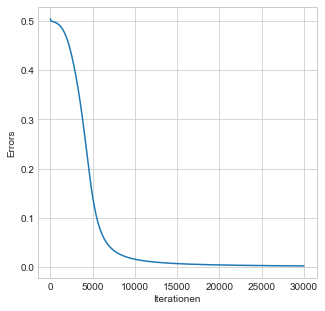

Predict:
[1.000 1.000 1.000] 0.0 -> [0.036]
[1.000 0.000 1.000] 1.0 -> [0.963]
[1.000 1.000 0.000] 1.0 -> [0.963]
[1.000 0.000 0.000] 0.0 -> [0.032]


In [46]:
import matplotlib.pyplot as plt
import numpy as np
from random import choice
import math
import sympy
from sklearn.utils.validation import check_random_state
# Wichtig!
%matplotlib inline

class MLP(object):
    # die identische Funktion
    def func_id(self, x):
        return x
    
    # weltberühmte Aktivierungsfunktion: Sigmoide
    def func_sigmoid(self, x):
        # np.exp statt math.exp wegen array-operationen
        return 1.0 / (1.0 + np.exp(-x))
    
    # die heutzutage beliebtere Rectifier-Funktion (für schnelleres Lernen) -> Neuron ReLU (Rectified Linear Unit)
    def func_relu(self, x):
        return np.maximum(x, 0)
    
    def __init__(self, n_input_neurons=2, n_hidden_neurons=2, n_output_neurons=1, weights=None,
                eta=0.01, n_iterations=1000, random_state=41, *args, **kwargs):
        """Initialisierung des Netzwerks
        
        Wir verwenden eine fixe I-H-O-Struktur für den Anfang, Neuronenanzahl flexibel
        Initialisierung mit Gewichten möglich [W_IH, W_HO]
        """
        # Anzahl Neuronen pro Layer
        self.n_input_neurons = n_input_neurons
        self.n_hidden_neurons = n_hidden_neurons
        self.n_output_neurons = n_output_neurons
        # Gewichte
        self.weights = weights
        W_IH = []
        W_HO = []
        
        # Lernrate
        self.eta = eta
        # Iterationen
        self.n_iterations = n_iterations
        # Zufallsgenerator
        self.random_state = random_state
        self.random_state_ = check_random_state(self.random_state)
        # Fehler (fit)
        self.errors = []
        
        # Daten zur Netzberechnung
        self.network = []
        
        # Input Layer + Bias : Spalten = net_i, a_i, o_i, d_i, delta_i
        self.inputLayer = np.zeros((self.n_input_neurons + 1, 5))
        self.inputLayer[0] = 1.0
        self.network.append(self.inputLayer)
        
        # Gewichte zum Hidden Layer
        if weights:
            W_IH = self.weights[0]
        else:
            W_IH = 2 * self.random_state_.random_sample((self.n_hidden_neurons + 1, self.n_input_neurons + 1)) - 1
        self.network.append(W_IH)
        
        # Hidden Layer + Bias : Spalten = net_i, a_i, o_i, d_i, delta_i
        self.hiddenLayer = np.zeros((self.n_hidden_neurons + 1, 5))
        self.hiddenLayer[0] = 1.0
        self.network.append(self.hiddenLayer)
        
        # Gewichte zum Output
        if weights:
            W_HO = self.weights[1]
        else:
            W_HO = 2 * self.random_state_.random_sample((self.n_output_neurons + 1, self.n_hidden_neurons + 1)) - 1
        self.network.append(W_HO)
        
        # Output Layer + Bias : Spalten = net_i, a_i, o_i, d_i, delta_i (Bias 0, da nicht relevant)
        self.outputLayer = np.zeros((self.n_output_neurons + 1, 5))
        self.outputLayer[0] = 0.0
        self.network.append(self.outputLayer)
    
    def print(self):
        print('Multi-Layer-Perceptron - Netzwerkarchitektur')
        np.set_printoptions(\
            formatter={'float': lambda x: "{0:0.3f}".format(x)})
        for idx, nn_part in enumerate(self.network):
            print(nn_part)
            print('-----------v-----------')
    
    def predict(self, x):
        """Für Eingabe x wird Ausgabe y_hat berechnet
        
        Vorhersage für Vektor x
        """
        # Input Layer setzen: alle Zeilen, Spalte 2
        self.network[0][:,2] = x
        
        # Hidden Layer (start bei 1 wegen Bias-Neuron)
        # net_j = W_ij . x
        self.network[2][1:,0] = np.dot(self.network[1][1:,:], self.network[0][:,2])
        # a_j
        self.network[2][1:,1] = self.func_sigmoid(self.network[2][1:,0])
        # o_j
        self.network[2][1:,2] = self.func_id(self.network[2][1:,1])
        # der_j = a_j * (1 - a_j) Ableitung für Sigmoide
        self.network[2][1:,3] = self.network[2][1:,2] * (1.0 - self.network[2][1:,2])
        
        # Output Layer
        # net_k = Wjk . h
        self.network[4][1:,0] = np.dot(self.network[3][1:,:], self.network[2][:,2])
        # a_k
        self.network[4][1:,1] = self.func_sigmoid(self.network[4][1:,0])
        # o_k
        self.network[4][1:,2] = self.func_id(self.network[4][1:,1])
        # der_k = a_k * (1 - a_k) Ableitung für Sigmoide
        self.network[4][1:,3] = self.network[4][1:,2] * (1.0 - self.network[4][1:,2])
        
        return self.network[4][:,2]
    
    def fit(self, X, Y):
        """Lernen
        """
        # Gewichtsänderungen
        delta_w_jk = []
        delta_w_ij = []
        # Fehler
        self.errors = []
        # Alle Iterationen
        for iteration in range(self.n_iterations):
            # für alle Trainingsbeispiele
            error = 0.0
            
            for x, y in zip(X, Y):
                ###########
                # Vorwärtspfad
                y_hat = self.predict(x)
                # Differenz
                diff = y - y_hat
                # quadratischer Fehler
                error += 0.5 * np.sum(diff * diff)
                
                ###########
                # Output Layer
                # delta_k = der_k * e_k
                self.network[4][:,4] = self.network[4][:,3] * diff
                
                ###########
                # Hidden Layer
                # delta_j = der_j * dot(W_kj^T, delta_k)
                self.network[2][:,4] = self.network[2][:,3] * np.dot(self.network[3][:].T, self.network[4][:,4])
                
                ###########
                # Gewichtsdeltas (W_kj)
                # delta_w = eta * delta_k . o_j^T
                delta_w_jk = self.eta * np.outer(self.network[4][:,4], self.network[2][:,2].T)
                # Gewichtsdeltas (W_ji)
                # delta_w = eta * delta_j . o_i^T
                delta_w_ij = self.eta * np.outer(self.network[2][:,4], self.network[0][:,2].T)
                
                ###########
                # Gewichte anpassen
                self.network[1][:,:] += delta_w_ij
                self.network[3][:,:] += delta_w_jk
                
            # Fehler sammeln
            self.errors.append(error)
    
    def plot(self):
        """Ausgabe des Fehlers
        Die im Fehlerarray gespeicherten Fehler als Grafik
        """
        fignr = 1
        plt.figure(fignr, figsize=(5, 5))
        plt.plot(self.errors)
        
        plt.style.use('seaborn-whitegrid')
        plt.xlabel('Iterationen')
        plt.ylabel('Errors')
        
        plt.show()
        
#######################################################################################

# Initialisierung
X = np.array([[1.0,1.0,1.0],[1.0,0.0,1.0],[1.0,1.0,0.0],[1.0,0.0,0.0]])
Y = np.array([[0.0, 0.0], [0.0, 1.0], [0.0, 1.0], [0.0, 0.0]])

nn = MLP(eta=0.05, n_iterations=30000, random_state=42)

# Training
nn.fit(X, Y)
nn.print()

nn.plot()


print('Predict:')
for x, y in zip(X, Y):
    print('{} {} -> {}'.format(x, y[1], nn.predict(x)[1:2]))